# Week 5 Coding Assignment

*Name*: Zachary Novak

*PID*: za659148

*Date*: 2/14/2025

## Questions 

1. Import modules.
1. Load the titanic dataset.
1. Show the first five data rows.
1. Recreate the following plots:
- Joint Plot with a scatter plot in the center and marginal histograms
- Histogram of Fares
- Class vs Age Box Plot
- Swarm Plot
- Count Plot
- Heatmap of Correlation
- FacetGrid with histograms

In [1]:
# import module
import seaborn as sns

In [2]:
# load and preview the 'titanic' dataset
titanic = sns.load_dataset('titanic')
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Joint Plot with a scatter plot in the center and marginal histograms
The JointGrid graph shows how two variables are related by displaying their combined data along with separate histograms for each. From my research, Seaborn is not able to have multiple bin widths in the histogram margins. Because of this, I chose a value in the middle of what both axis in the example use. 

Text(0.5, 1, 'Fare vs Age Joint Plot')

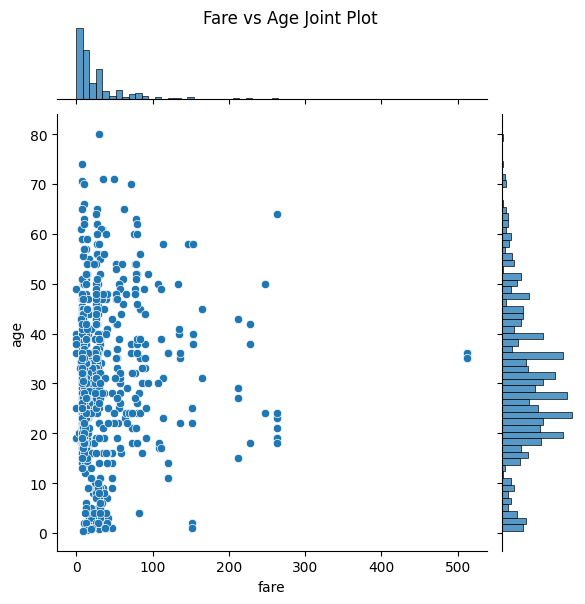

In [3]:
# joint plot of 'fare' vs 'age'
joint_plot = sns.jointplot(data=titanic, x="fare", y="age", kind="scatter", marginal_kws={'bins': 60})
# set title
joint_plot.figure.suptitle("Fare vs Age Joint Plot", y=1)


### Histogram of Fares
The histogram shows how 'fare' values are spread out, helping to see the range and common amounts.

Text(0.5, 1.0, 'Fare Distribution')

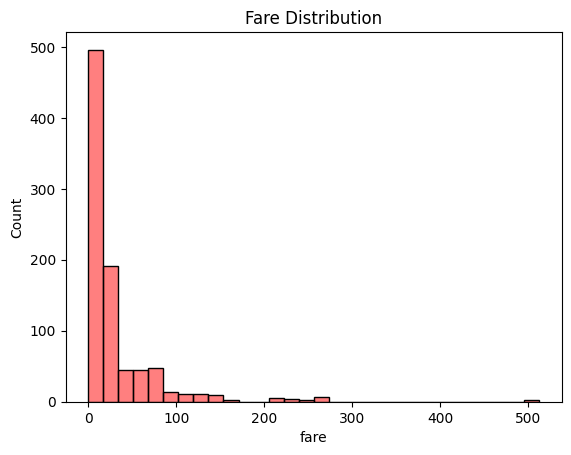

In [4]:
# histogram of 'fare'
histplot = sns.histplot(titanic['fare'], bins=30, color='red', alpha=0.5)
# set title
histplot.set_title('Fare Distribution')

### Class Vs. Age Box Plot
The box plot compares 'class' and 'age,' showing how ages differ between different classes.

Text(0.5, 1.0, 'Boxplot of Age by Class')

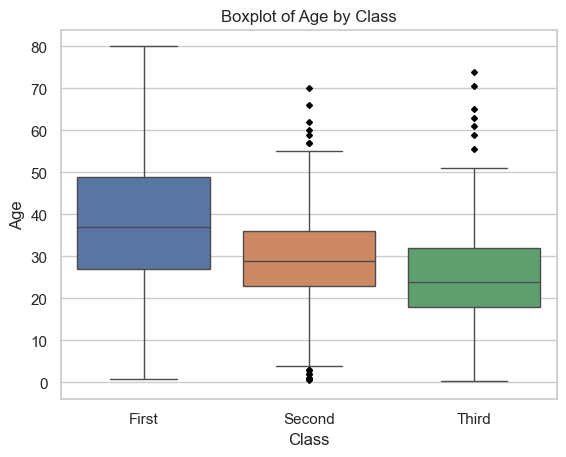

In [5]:
# apply a style to the plot
sns.set_theme(style="whitegrid")

# define how outlier markers should look so they match the homework's style
flierprops = {
    'marker': 'D',              # use a diamond shape
    'markerfacecolor': 'black', # fill the markers with black
    'markeredgecolor': 'black', # keep the edges black
    'markersize': 3,            # set smaller size
}

# create the boxplot with the specified look
boxplot = sns.boxplot(
    x="class", 
    y="age", 
    hue="class",   # assign colors based on class (x)
    data=titanic, 
    palette="deep", # use a deep color palette for better contrast
    order=["First", "Second", "Third"], # order the classes for clarity
    flierprops=flierprops # apply the custom outlier marker settings
)

# set y axis limits to match the homework's style
boxplot.set_ylim(-4, 84)

# set x- and y-axis label
boxplot.set_xlabel("Class") 
boxplot.set_ylabel("Age")

# set the title of the plot
boxplot.set_title("Boxplot of Age by Class")


### Swarmplot
The swarmplot repeats the 'class' and 'age' comparison, making it easier to spot any trends. I decreased the size of markers because not all the values were being shown. Hopefully, this doesn't remove points but I don't like seeing errors after running.

Text(0.5, 1.0, 'Age Distribution by Passenger Class (Swarm Plot)')

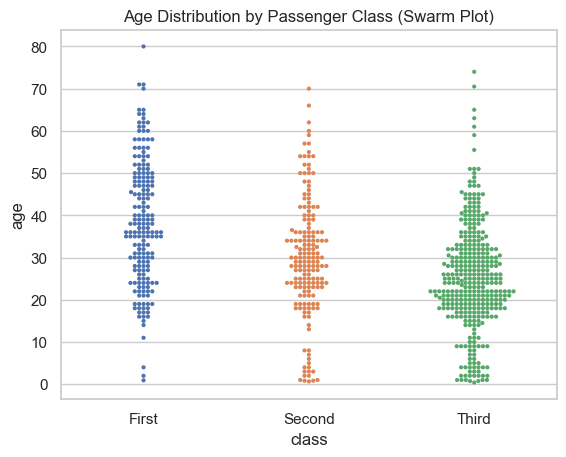

In [6]:
# create the swarm plot
# size had to be decreased to run without error or warning
swarmplot = sns.swarmplot(x="class", y="age", data=titanic, size=3, hue='class', palette="deep", order=["First", "Second", "Third"])

# set title
swarmplot.set_title("Age Distribution by Passenger Class (Swarm Plot)")

### Count Plot
The count plot shows how many people belong to each 'sex' category, making it easy to compare group sizes.

Text(0.5, 1.0, 'Count of Passenger Sexes')

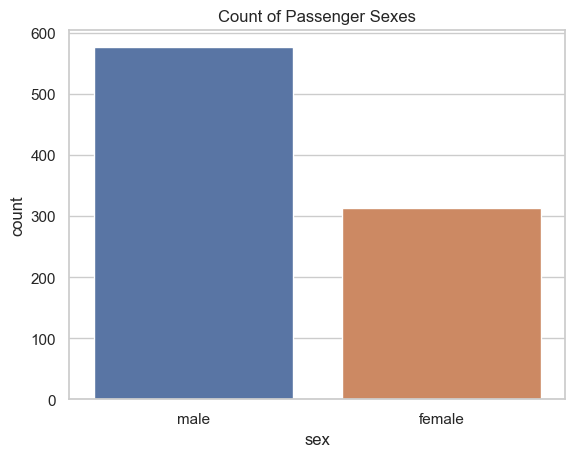

In [7]:
# create the count plot
countplot = sns.countplot(x="sex", data=titanic, hue="sex", palette="deep")
# set title
countplot.set_title("Count of Passenger Sexes")

### Heatmap of Correlation
The correlation matrix is calculated to see how strongly two variables are related. Then, a heatmap is constructed to add a visual element to this relationship.

Text(0.5, 1.0, 'Correlation Heatmap')

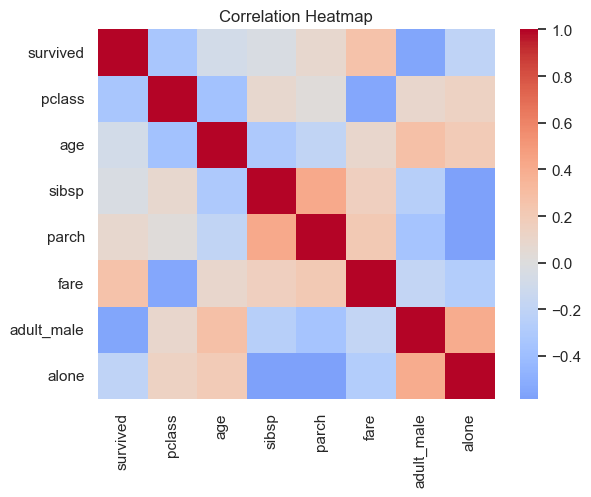

In [8]:
# calculate the correlation values of numeric columns
corr_matrix = titanic.corr(numeric_only=True)
# create the heatmap with the correlation values
heatmap = sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
# set title
heatmap.set_title("Correlation Heatmap")

### FacetGrid with histograms
The facetgrid with histograms organizes multiple graphs into a grid, helping to compare different categories side by side

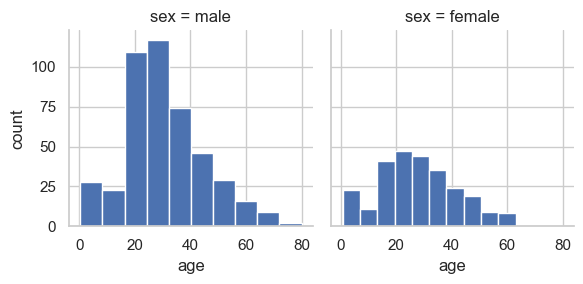

In [9]:
# create the FacetGrid
graph = sns.FacetGrid(titanic, col="sex")
# map the histogram to the grid
graph.map_dataframe(sns.histplot, "age", bins=10, alpha=1)
# set axis labels and titles
graph.set_axis_labels("age", "count")
# set the title for each subplot
graph.set_titles(col_template="sex = {col_name}")